In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import vmo
import vmo.generate as vge
import music21
import sys
import os

%matplotlib inline

In [8]:
filename = os.path.abspath('') + '/../files/Suite_no._1_for_Solo_Cello_Prelude.mxl'
print(filename)

/Users/cheng-iwang/Documents/workspace/vmo/bin/notebooks/../files/Suite_no._1_for_Solo_Cello_Prelude.mxl


In [9]:
s = music21.converter.parse(filename)
c = s.getElementById('Violoncello')
m = c.flat.notes
note_obj_seq = [x for x in m if type(x) is music21.note.Note]    
bo = vmo.build_oracle(note_obj_seq,'f')
bo.name = 'bach_cello_example'
b, kend, ktrace = vge.generate(bo, len(note_obj_seq), 0.0, 0, LRS=2, weight='weight')

In [10]:
stream1 = music21.stream.Stream()
x = [bo.data[i] for i in b]

In [11]:
for i in range(len(x)):
    _n = music21.note.Note(x[i][0].nameWithOctave)
    _n.duration.type = x[i][0].duration.type
    _n.duration = x[i][0].duration 
    stream1.append(_n)

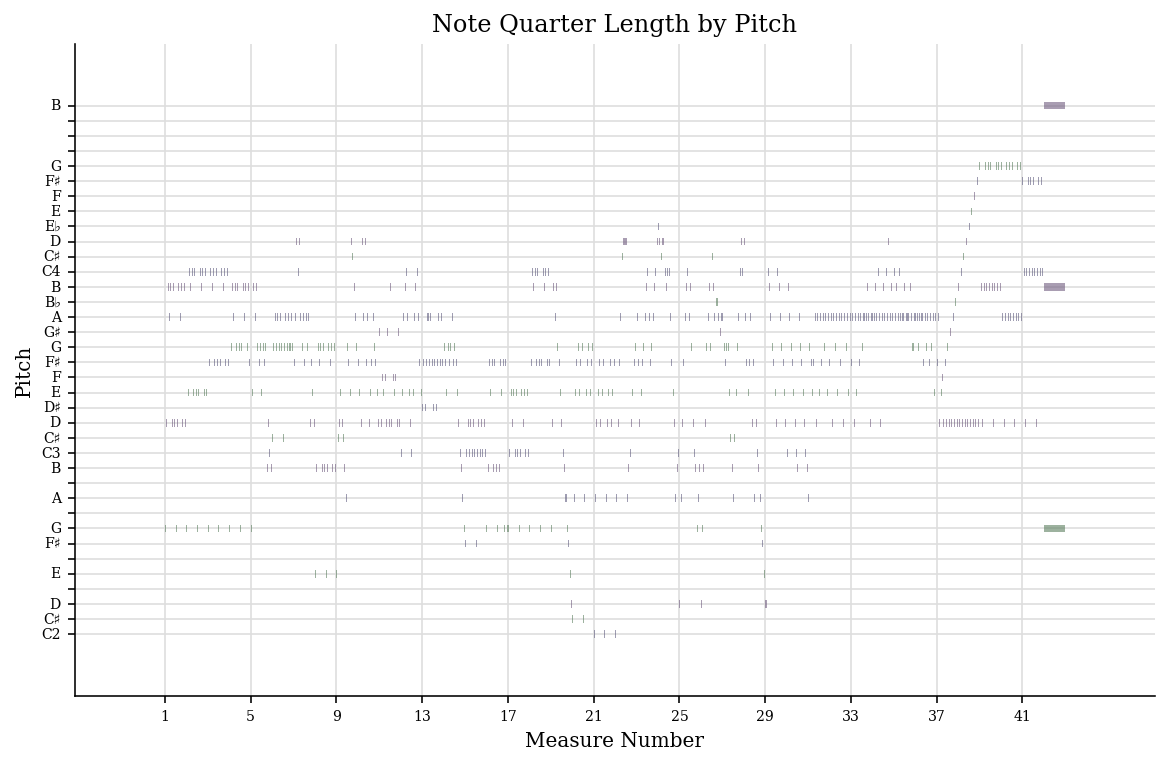

In [12]:
s.plot()

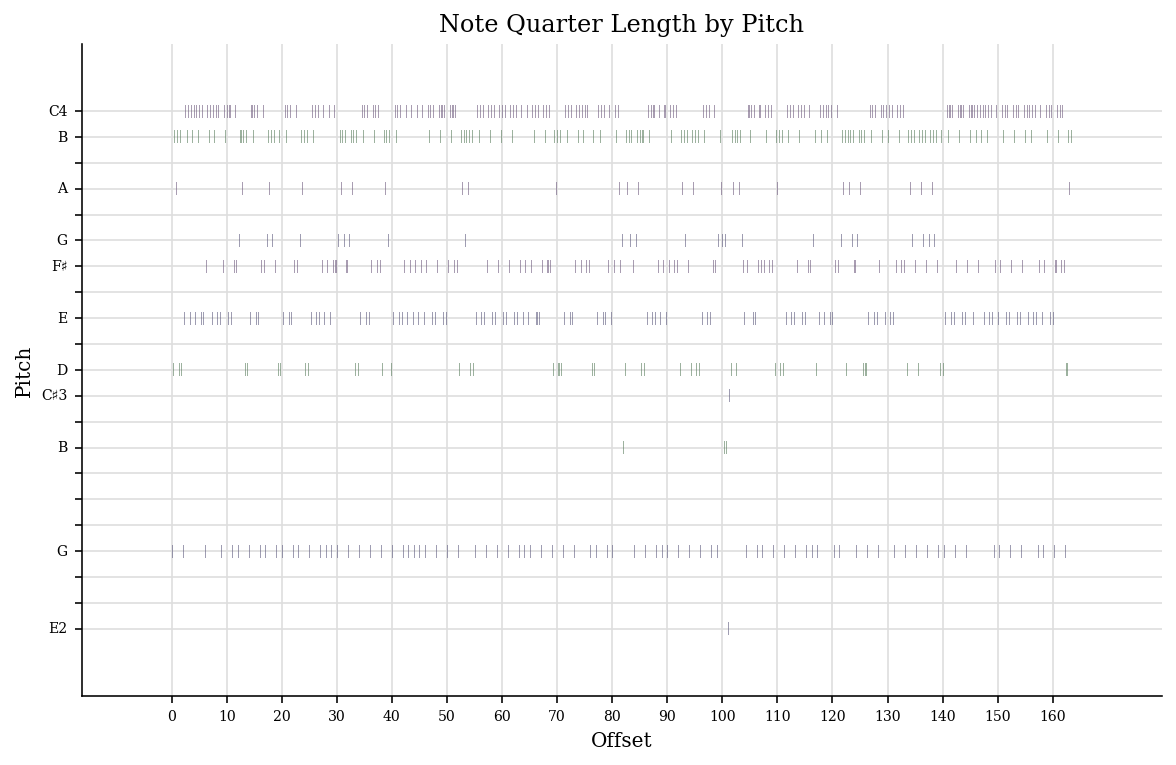

In [13]:
stream1.plot()